<a href="https://colab.research.google.com/github/sipocz/Blood/blob/main/Blood_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

In [2]:
fname_url="https://github.com/sipocz/Blood/raw/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip"
fname=fname_url.split("/")[-1]

In [3]:
!wget $fname_url


--2021-11-29 23:03:29--  https://github.com/sipocz/Blood/raw/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/Blood/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip [following]
--2021-11-29 23:03:29--  https://raw.githubusercontent.com/sipocz/Blood/b5fc44c487b0a712d00865014203349fb8690257/orig/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16979362 (16M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  16,19M  10,6MB/s    in 1,5s    

2021-11-29 23:03:31 (10,6 MB/s) - ‘train.z

In [4]:
!mkdir "train"
!rm ./train/Train.csv

mkdir: cannot create directory ‘train’: File exists


In [5]:
!unzip $fname -d "./train"
!rm train.zip

Archive:  train.zip
  inflating: ./train/Train.csv       


In [6]:
fname_train="./train/Train.csv"
df=pd.read_csv(fname_train)

In [7]:
df.head(25)

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,ok,ok,ok
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,ok,high,high
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,ok,ok,high
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,low,ok,high
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,ok,ok,high
5,ID_3LCCBJVO,0.547021,0.553422,0.563921,0.567715,0.579869,0.590251,0.595393,0.597208,0.604721,...,1.301758,1.273375,1.246971,1.254424,1.288679,43.64,18.85,low,ok,ok
6,ID_4TK4WAI7,0.517956,0.522156,0.529304,0.544396,0.553598,0.561382,0.564694,0.567961,0.577555,...,1.087181,1.058432,1.058078,1.062706,1.017410,40.82,25.71,ok,ok,high
7,ID_JH3G89RM,0.497032,0.495025,0.494494,0.503662,0.508607,0.512761,0.518266,0.527049,0.534846,...,1.259352,1.269610,1.242295,1.291084,1.307972,35.61,39.29,ok,ok,high
8,ID_2PF9JK4O,0.476799,0.481452,0.483358,0.490046,0.491382,0.500921,0.506735,0.512667,0.521872,...,1.193640,1.175582,1.160317,1.177578,1.199889,42.66,36.49,low,ok,high
9,ID_TG56LKBY,0.501158,0.511572,0.513042,0.520507,0.532246,0.534862,0.538399,0.542913,0.551720,...,1.216975,1.195616,1.176820,1.194605,1.188291,40.51,27.73,ok,ok,high


In [8]:
def one_hot_encode_df(df,str_index):
    from sklearn.preprocessing import OneHotEncoder
    indf=df.copy(True)
    one_hot=OneHotEncoder()
    col=indf[str_index].values
    col=col.reshape(-1,1)
    one_hot.fit(col)
    out=one_hot.transform(col).toarray()
    codes=one_hot.get_feature_names()
    print(codes)
    for ind,code in enumerate(codes):
        print("Itt:",ind,codes[ind])
        indf[str_index+"_"+code]=out[:,ind]
    return(indf,one_hot)


In [9]:
hdl_col_df,hdl_onehot=one_hot_encode_df(df,"hdl_cholesterol_human")
hemo_df,hemo_onehot=one_hot_encode_df(df,"hemoglobin(hgb)_human")
col_df,col_onehot=one_hot_encode_df(df,"cholesterol_ldl_human")

['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok
['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok
['x0_high' 'x0_low' 'x0_ok']
Itt: 0 x0_high
Itt: 1 x0_low
Itt: 2 x0_ok


In [10]:
hemo_df.tail()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human,hemoglobin(hgb)_human_x0_high,hemoglobin(hgb)_human_x0_low,hemoglobin(hgb)_human_x0_ok
13135,ID_NGPC0DA3,0.483513,0.482732,0.487531,0.497946,0.500697,0.505740,0.511904,0.519018,0.529455,...,1.188173,1.188303,34.79,36.93,high,ok,ok,0.0,0.0,1.0
13136,ID_XRBUD5U8,0.525435,0.527563,0.528863,0.531776,0.541156,0.547318,0.552549,0.559060,0.566892,...,1.395317,1.387709,43.12,19.14,ok,ok,ok,0.0,0.0,1.0
13137,ID_2M9L5NV2,0.512718,0.517815,0.524857,0.525466,0.536542,0.542930,0.550628,0.558939,0.567593,...,1.447840,1.384221,42.48,43.41,ok,ok,ok,0.0,0.0,1.0
13138,ID_C5V5SD2D,0.456747,0.472575,0.466935,0.466698,0.478546,0.486451,0.494838,0.496540,0.508274,...,1.154095,1.212907,41.86,35.10,ok,ok,ok,0.0,0.0,1.0
13139,ID_9R5ZR9NX,0.498372,0.501692,0.505924,0.510975,0.516707,0.520821,0.531242,0.537302,0.547303,...,1.350667,1.420639,42.91,26.30,high,ok,high,0.0,0.0,1.0


In [11]:
del hdl_col_df["hdl_cholesterol_human"]
del hdl_col_df["hemoglobin(hgb)_human"]
del hdl_col_df["cholesterol_ldl_human"]
del hemo_df["hdl_cholesterol_human"]
del hemo_df["hemoglobin(hgb)_human"]
del hemo_df["cholesterol_ldl_human"]
del col_df["hdl_cholesterol_human"]
del col_df["hemoglobin(hgb)_human"]
del col_df["cholesterol_ldl_human"]




In [12]:
hdl_col_df.head()

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human_x0_high,hdl_cholesterol_human_x0_low,hdl_cholesterol_human_x0_ok
0,ID_3SSHI56C,0.479669,0.477423,0.487956,0.491831,0.500516,0.502590,0.511561,0.514639,0.524245,...,1.218660,1.213038,1.198317,1.195735,1.180846,42.51,34.01,0.0,0.0,1.0
1,ID_599OOLZA,0.471537,0.474113,0.479981,0.485528,0.491049,0.497942,0.504760,0.510543,0.522328,...,1.304501,1.323005,1.305992,1.263887,1.262095,44.52,32.09,0.0,0.0,1.0
2,ID_MVJGPQ75,0.444998,0.458034,0.447386,0.456921,0.463225,0.475983,0.476817,0.481565,0.490010,...,1.325059,1.271115,1.337119,1.289877,1.345229,45.77,24.80,0.0,0.0,1.0
3,ID_CK6RF8YV,0.513434,0.513303,0.522609,0.521068,0.523146,0.530132,0.539517,0.546364,0.552414,...,1.298422,1.299873,1.311157,1.303259,1.349833,45.84,36.93,0.0,1.0,0.0
4,ID_82N6QE6I,0.510485,0.519359,0.524225,0.528419,0.535273,0.545342,0.550314,0.557129,0.567030,...,1.272367,1.290032,1.339771,1.322738,1.348964,38.92,23.88,0.0,0.0,1.0


In [13]:
hdl_col_df.describe()

,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,absorbance9,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human_x0_high,hdl_cholesterol_human_x0_low,hdl_cholesterol_human_x0_ok
count,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,...,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000
mean,0.507347,0.509800,0.513687,0.519391,0.525976,0.533482,0.539453,0.544755,0.552902,0.565279,...,1.271131,1.264782,1.262234,1.274563,1.261993,41.088709,31.534744,0.196347,0.232877,0.570776
std,0.042075,0.041587,0.041525,0.041676,0.041125,0.040644,0.040715,0.040946,0.040820,0.041038,...,0.085519,0.092525,0.097079,0.103298,0.102908,2.964205,8.118994,0.397249,0.422680,0.494984
min,0.237409,0.251987,0.269550,0.284636,0.302883,0.318334,0.333950,0.345124,0.361352,0.374106,...,0.993182,0.987268,0.963837,0.965659,0.951658,30.480000,16.610000,0.000000,0.000000,0.000000
25%,0.485665,0.487773,0.491302,0.495686,0.501565,0.508257,0.514780,0.520312,0.528137,0.539653,...,1.217083,1.205337,1.198471,1.206278,1.194331,39.030000,25.057500,0.000000,0.000000,0.000000
50%,0.510919,0.513115,0.517337,0.523236,0.529703,0.536550,0.542027,0.547747,0.555886,0.569253,...,1.270125,1.263422,1.260902,1.270895,1.257434,41.090000,30.075000,0.000000,0.000000,1.000000
75%,0.528750,0.531115,0.535573,0.541501,0.547925,0.554984,0.561157,0.566591,0.575060,0.587514,...,1.324954,1.322994,1.322975,1.337093,1.325678,42.870000,36.700000,0.000000,0.000000,1.000000
max,0.657782,0.652291,0.659153,0.658982,0.659410,0.667296,0.672708,0.680601,0.691116,0.704255,...,1.527945,1.539556,1.584125,1.672314,1.653452,52.690000,63.070000,1.000000,1.000000,1.000000


In [14]:
minmax=MinMaxScaler()
minmax.fit(hdl_col_df.iloc[:,1:])
data_transform=minmax.transform(hdl_col_df.iloc[:,1:])

In [39]:
X=data_transform[:,:-3]
y_hdl_col=hdl_col_df.iloc[:,-3:]
y_hemo=hemo_df.iloc[:,-3:]
y_hemo=hemo_df.iloc[:,-3:]
y_col=col_df.iloc[:,-3:]

In [16]:
import tensorflow as tf
from keras.layers import InputLayer, Dense, LSTM, Input, Dropout,Embedding, Flatten,LayerNormalization
from keras.models import Sequential, Model

import keras.optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.backend import clear_session
from tensorflow.keras.losses import mean_absolute_percentage_error, huber,kld,mse

from keras.preprocessing.sequence import pad_sequences

In [17]:
def blood_model():
    #clear_session()



    input_len=len(X[0])

    print(input_len)
    output_size=3
    drop_frac0=0.0 
    drop_frac1=0.0



    input1=Input(shape=(input_len,),)

    #flatt=Flatten()(lstm1)

    non=42
    #initializer = tf.keras.initializers.LecunNormal()
    #initializer=tf.keras.initializers.LecunUniform()
    #initializer=tf.keras.initializers.HeUniform(    seed=None)
    #initializer= tf.keras.initializers.RandomNormal(    mean=3.0, stddev=0.05, seed=None)

    initializer="normal"
    d1=Dense(9,activation="selu",kernel_initializer=initializer,input_dim=input_len,name="bottle")(input1)
    d1=Dropout(drop_frac0)(d1)
    


    pred=Dense(input_len,activation="selu")(d1)

    model = Model(inputs=input1, outputs=pred)

    opt = tf.keras.optimizers.Adamax(learning_rate=0.01)


    #lossfn = tf.keras.metrics.MSE()

    model.compile(loss="MSE",
        optimizer=opt,
        metrics=["MSE"])
    return(model)

In [18]:
!rm *.hdf5

In [19]:
model_name="hdl_col"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        
        #savemodela,
        ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [20]:
hdl_model=blood_model()

172


In [21]:
hdl_model.fit(X,
          X,
          epochs=450, 
          batch_size=32,
          validation_split=0.2,
          verbose=1,
          callbacks=callbacks,
          shuffle=True
          
          )

Epoch 1/1000
329/329 [==============================] - 1s 2ms/step - loss: 0.0519 - MSE: 0.0519 - val_loss: 0.0088 - val_MSE: 0.0088

Epoch 00001: val_MSE improved from inf to 0.00883, saving model to hdl_col_0.00883_.hdf5
Epoch 2/1000
329/329 [==============================] - 0s 1ms/step - loss: 0.0087 - MSE: 0.0087 - val_loss: 0.0078 - val_MSE: 0.0078

Epoch 00002: val_MSE improved from 0.00883 to 0.00785, saving model to hdl_col_0.00785_.hdf5
Epoch 3/1000
329/329 [==============================] - 0s 1ms/step - loss: 0.0073 - MSE: 0.0073 - val_loss: 0.0061 - val_MSE: 0.0061

Epoch 00003: val_MSE improved from 0.00785 to 0.00608, saving model to hdl_col_0.00608_.hdf5
Epoch 4/1000
329/329 [==============================] - 0s 1ms/step - loss: 0.0049 - MSE: 0.0049 - val_loss: 0.0035 - val_MSE: 0.0035

Epoch 00004: val_MSE improved from 0.00608 to 0.00348, saving model to hdl_col_0.00348_.hdf5
Epoch 5/1000
329/329 [==============================] - 0s 1ms/step - loss: 0.0028 - MSE: 0.

KeyboardInterrupt: 

In [22]:
model_name="col"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        

        
        #savemodela,
    ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [23]:
col_model=blood_model()

172


In [24]:
col_model.fit(X,
          X,
          epochs=230, 
          batch_size=22,
          validation_split=0.1,
          verbose=0,
          callbacks=callbacks,
          shuffle=False
          
          )


Epoch 00001: val_MSE improved from inf to 0.00845, saving model to col_0.00845_.hdf5

Epoch 00002: val_MSE improved from 0.00845 to 0.00444, saving model to col_0.00444_.hdf5

Epoch 00003: val_MSE improved from 0.00444 to 0.00191, saving model to col_0.00191_.hdf5

Epoch 00004: val_MSE improved from 0.00191 to 0.00150, saving model to col_0.00150_.hdf5

Epoch 00005: val_MSE improved from 0.00150 to 0.00115, saving model to col_0.00115_.hdf5

Epoch 00006: val_MSE improved from 0.00115 to 0.00085, saving model to col_0.00085_.hdf5

Epoch 00007: val_MSE improved from 0.00085 to 0.00067, saving model to col_0.00067_.hdf5

Epoch 00008: val_MSE improved from 0.00067 to 0.00060, saving model to col_0.00060_.hdf5

Epoch 00009: val_MSE improved from 0.00060 to 0.00057, saving model to col_0.00057_.hdf5

Epoch 00010: val_MSE improved from 0.00057 to 0.00053, saving model to col_0.00053_.hdf5

Epoch 00011: val_MSE improved from 0.00053 to 0.00048, saving model to col_0.00048_.hdf5

Epoch 00012: 

KeyboardInterrupt: 

In [25]:
model_name="hemo"
def scheduler(epoch, lr):
    return 0.001

callback_LR = tf.keras.callbacks.LearningRateScheduler(scheduler)

callbacks = [callback_LR,
        
        #savemodela,
            ModelCheckpoint(filepath=model_name+"_{val_MSE:.5f}_.hdf5", monitor='val_MSE',
                        verbose=1, save_best_only=True, mode='min')]

In [26]:
hemo_model=blood_model()

172


In [27]:
hemo_model.fit(X,
          X,
          epochs=230, 
          batch_size=12,
          validation_split=0.1,
          verbose=1,
          callbacks=callbacks,
          shuffle=False
          
          )

Epoch 1/230
986/986 [==============================] - 2s 1ms/step - loss: 0.0222 - MSE: 0.0222 - val_loss: 0.0045 - val_MSE: 0.0045

Epoch 00001: val_MSE improved from inf to 0.00447, saving model to hemo_0.00447_.hdf5
Epoch 2/230
986/986 [==============================] - 1s 1ms/step - loss: 0.0027 - MSE: 0.0027 - val_loss: 0.0019 - val_MSE: 0.0019

Epoch 00002: val_MSE improved from 0.00447 to 0.00189, saving model to hemo_0.00189_.hdf5
Epoch 3/230
986/986 [==============================] - 1s 1ms/step - loss: 0.0015 - MSE: 0.0015 - val_loss: 0.0011 - val_MSE: 0.0011

Epoch 00003: val_MSE improved from 0.00189 to 0.00109, saving model to hemo_0.00109_.hdf5
Epoch 4/230
986/986 [==============================] - 1s 1ms/step - loss: 8.8906e-04 - MSE: 8.8906e-04 - val_loss: 6.9765e-04 - val_MSE: 6.9765e-04

Epoch 00004: val_MSE improved from 0.00109 to 0.00070, saving model to hemo_0.00070_.hdf5
Epoch 5/230
986/986 [==============================] - 1s 1ms/step - loss: 6.3574e-04 - MSE:

In [40]:
X[0]

array([0.57629797, 0.56316263, 0.56058608, 0.55348446, 0.55432924,
       0.52801177, 0.52429853, 0.50529651, 0.49396945, 0.4908818 ,
       0.47677241, 0.47466856, 0.46398309, 0.46296189, 0.45314056,
       0.4461359 , 0.44496283, 0.44416027, 0.43586569, 0.43853278,
       0.43820073, 0.43619613, 0.43587531, 0.43594288, 0.42574665,
       0.43109712, 0.43362324, 0.43267825, 0.42976148, 0.43394287,
       0.43184588, 0.43866202, 0.4327672 , 0.431208  , 0.43553574,
       0.4331199 , 0.43502257, 0.4306428 , 0.43040646, 0.42566461,
       0.42792858, 0.42574241, 0.42172644, 0.42014705, 0.41649629,
       0.40968119, 0.4075168 , 0.40835163, 0.40112821, 0.39484841,
       0.39387877, 0.38614882, 0.38647705, 0.38217006, 0.37493735,
       0.3699833 , 0.36920971, 0.36554815, 0.36796923, 0.37310292,
       0.36670567, 0.36726969, 0.36314847, 0.36048029, 0.35013203,
       0.34812045, 0.34701882, 0.34821374, 0.34586192, 0.34227702,
       0.33816833, 0.33752315, 0.3293699 , 0.32742852, 0.32797

In [30]:
col_pred=col_model.predict(X)
hemo_pred=hemo_model.predict(X)
hdl_pred=hdl_model.predict(X)


In [70]:
col_model_bottle=Model(col_model.inputs,col_model.get_layer("bottle").output)
hemo_model_bottle=Model(hemo_model.inputs,hemo_model.get_layer("bottle").output)
hdl_model_bottle=Model(hdl_model.inputs,hdl_model.get_layer("bottle").output)




In [71]:
col_pred_bottle=col_model_bottle.predict(X)
hemo_pred_bottle=hemo_model_bottle.predict(X)
hdl_pred_bottle=hdl_model_bottle.predict(X)



In [72]:
col_pred_bottle

array([[ 9.8203671e-01, -1.7115411e-01,  7.6562732e-01, ...,
         2.5782922e-01,  1.0369316e+00,  8.5157919e-01],
       [ 1.4743630e+00, -1.2410144e-01,  1.2089920e+00, ...,
         5.3377253e-01,  1.1657144e+00,  7.7111155e-01],
       [ 1.4555399e+00, -1.3387297e-01,  1.0268257e+00, ...,
         5.9435624e-01,  9.7663850e-01,  8.9175183e-01],
       ...,
       [ 1.7401044e+00,  1.6336947e-03,  1.3076365e+00, ...,
         5.0213784e-01,  1.1736637e+00,  1.6565405e+00],
       [ 7.5806379e-01, -8.7329373e-02,  4.8945516e-01, ...,
         2.4626873e-01,  6.8693858e-01,  1.3174695e+00],
       [ 1.7925804e+00, -2.2386320e-01,  1.3498740e+00, ...,
         5.9219128e-01,  1.2023525e+00,  1.2337712e+00]], dtype=float32)

In [98]:
NUM_OF_COMP=4

In [99]:


import numpy as np
from sklearn.decomposition import PCA

col_pca = PCA(n_components=NUM_OF_COMP)
col_pca_values=col_pca.fit_transform(col_pred_bottle)

print(col_pca.explained_variance_ratio_)

print(col_pca.singular_values_)

[0.58166724 0.25538504 0.0699311  0.03222274]
[75.622086 50.10823  26.220835 17.798876]


In [100]:
import numpy as np
from sklearn.decomposition import PCA

hemo_pca = PCA(n_components=NUM_OF_COMP)
hemo_pca_values=hemo_pca.fit_transform(hemo_pred_bottle)

print(hemo_pca.explained_variance_ratio_)

print(hemo_pca.singular_values_)

[0.5523145  0.2891939  0.05678467 0.03466041]
[68.01856  49.218544 21.809704 17.039274]


In [101]:
import numpy as np
from sklearn.decomposition import PCA

hdl_pca = PCA(n_components=NUM_OF_COMP)
hdl_pca_values=hdl_pca.fit_transform(hdl_pred_bottle)

print(hdl_pca.explained_variance_ratio_)

print(hdl_pca.singular_values_)

[0.6065822  0.28248438 0.04416889 0.02205023]
[80.9584   55.24771  21.84617  15.435605]


In [102]:
colors=df["hdl_cholesterol_human"]


In [103]:
colors_num=[]
for col in colors:
    if col=="ok":
        colors_num.append(0)
    if col=="high":
        colors_num.append(12)
    if col=="low":
        colors_num.append(24)
    
        

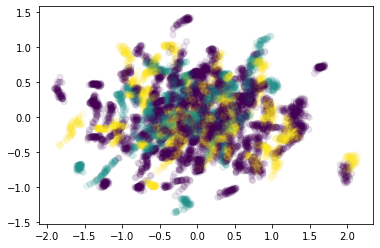

In [104]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(col_pca_values[:,0], col_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

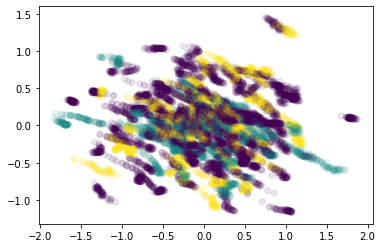

In [110]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(hemo_pca_values[:,0], hemo_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

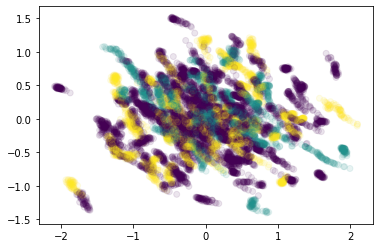

In [106]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

plt.scatter(hdl_pca_values[:,0], hdl_pca_values[:,1],c=colors_num, alpha=0.1)
plt.show()

In [120]:
col_pred_bottle=col_model_bottle.predict(X)
hemo_pred_bottle=hemo_model_bottle.predict(X)
hdl_pred_bottle=hdl_model_bottle.predict(X)
df["hdl_cholesterol_human"]

0          ok
1          ok
2          ok
3         low
4          ok
         ... 
13135    high
13136      ok
13137      ok
13138      ok
13139    high
Name: hdl_cholesterol_human, Length: 13140, dtype: object

In [121]:
df.head(0)

,Reading_ID,absorbance0,absorbance1,absorbance2,absorbance3,absorbance4,absorbance5,absorbance6,absorbance7,absorbance8,...,absorbance165,absorbance166,absorbance167,absorbance168,absorbance169,temperature,humidity,hdl_cholesterol_human,hemoglobin(hgb)_human,cholesterol_ldl_human


In [122]:
# def a search matrix
def create_search_list(pred,df,str_index):
    out=[]
    for i,vec in enumerate(pred):
        out.append([vec,df[str_index].values[i]])
    return(out)
    
    

In [123]:
col_search_list=create_search_list(col_pred_bottle,df,"cholesterol_ldl_human")

In [126]:
col_search_list[0:8]

[[array([ 0.9820367 , -0.17115411,  0.7656273 , -0.30244032,  0.87662846,
         -0.2700193 ,  0.25782922,  1.0369316 ,  0.8515792 ], dtype=float32),
  'ok'],
 [array([ 1.474363  , -0.12410144,  1.208992  , -0.3070677 ,  1.0726131 ,
         -0.1151173 ,  0.5337725 ,  1.1657144 ,  0.77111155], dtype=float32),
  'high'],
 [array([ 1.45554   , -0.13387297,  1.0268257 , -0.0580136 ,  0.60320735,
         -0.1082515 ,  0.59435624,  0.9766385 ,  0.8917518 ], dtype=float32),
  'high'],
 [array([ 1.2018588 , -0.09807757,  0.60676366, -0.34202603,  0.65605086,
         -0.28642848,  0.4735798 ,  1.1069968 ,  1.3652653 ], dtype=float32),
  'high'],
 [array([ 1.1879566 , -0.31519797,  1.0102388 , -0.14146025,  0.8015934 ,
         -0.32287297,  0.32331008,  0.9289504 ,  1.9359226 ], dtype=float32),
  'high'],
 [array([ 1.4486763 , -0.3756709 ,  1.7090093 , -0.4350646 ,  1.6274179 ,
         -0.11935179,  0.53016126,  1.6968628 ,  1.2020859 ], dtype=float32),
  'ok'],
 [array([ 0.29930753, -0.2

In [127]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))


In [150]:
# calculate a cosine similarity between items im col_search_list
item1=col_search_list[5][0]
item2=col_search_list[7][0]

print(cosine_similarity(item1,item2))

0.92003477


In [154]:
for item2 in col_search_list:
    diff=cosine_similarity(item1,item2[0])
    if 1-diff<0.002:
        print (item2[1],end=",")

ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,ok,

In [ ]:
----

In [ ]:
import numpy as np
col_argm=np.argmax(col_pred,axis=1)
hemo_argm=np.argmax(hemo_pred,axis=1)
hdl_argm=np.argmax(hdl_pred,axis=1)




In [ ]:
hemo_argm=hemo_argm.reshape(-1,1)
hemo_predicted=hemo_onehot.inverse_transform(hemo_pred)

col_argm=col_argm.reshape(-1,1)
col_predicted=col_onehot.inverse_transform(col_pred)

hdl_argm=hdl_argm.reshape(-1,1)
hdl_predicted=hdl_onehot.inverse_transform(hdl_pred)




In [ ]:
def calc_status(pred,dfcolumn):
    i=0
    for index,element in enumerate(pred):

        if element != dfcolumn.iloc[index]:
            #print(f"{index}")
            i +=1
    print(f"{i} hibás, {i/len(pred)*100} % hiba")        

In [ ]:
calc_status(hemo_predicted,df["hemoglobin(hgb)_human"])

In [ ]:
df.columns

In [ ]:
calc_status(col_predicted,df["cholesterol_ldl_human"])

In [ ]:
calc_status(hdl_predicted,df["hdl_cholesterol_human"])

In [ ]:
# submission generation
!rm "./Test.csv"

In [ ]:
!wget https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/Test.csv

In [ ]:
test_df=pd.read_csv("./Test.csv")
test_df.head()

test_df['hdl_cholesterol_human']=0
test_df["hemoglobin(hgb)_human"]=0
test_df["cholesterol_ldl_human"]=0

In [ ]:
test_transform=minmax.transform(test_df.iloc[:,1:])

In [ ]:
X_test=test_transform[:,:-3]

In [ ]:
# load models
from keras.models import load_model
base_path="./models/"

col_name=base_path+"a_col_0.07273_0.98630_.hdf5"
hemo_name=base_path+"a_hemo_0.03083_0.99467_.hdf5"
hdl_name=base_path+"a_hdl_col_0.19090_0.92948_.hdf5"

col_model=load_model(col_name)
hemo_model=load_model(hemo_name)
hdl_model=load_model(hdl_name)


In [ ]:
col_pred_test=col_model.predict(X_test)
hemo_pred_test=hemo_model.predict(X_test)
hdl_pred_test=hdl_model.predict(X_test)

In [ ]:
import numpy as np
col_argm_test=np.argmax(col_pred_test,axis=1)
hemo_argm_test=np.argmax(hemo_pred_test,axis=1)
hdl_argm_test=np.argmax(hdl_pred_test,axis=1)

In [ ]:
hemo_predicted_test=hemo_onehot.inverse_transform(hemo_pred_test)
col_predicted_test=col_onehot.inverse_transform(col_pred_test)
hdl_predicted_test=hdl_onehot.inverse_transform(hdl_pred_test)

In [ ]:
outdf=pd.DataFrame()
outdf["Reading_ID"]=test_df["Reading_ID"]
outdf["hemoglobin(hgb)_human"]=hemo_predicted_test
outdf["cholesterol_ldl_human"]=col_predicted_test
outdf["hdl_cholesterol_human"]=hdl_predicted_test

outdf.set_index("Reading_ID",inplace=True)

In [ ]:
outdf.head(33)

In [ ]:
!rm SampleSubmission.csv
!wget https://github.com/sipocz/Blood/raw/9326effc5771a0f4cbeef5d97e329c986c9ba9dd/orig/SampleSubmission.csv

In [ ]:
submission_df=pd.read_csv("./SampleSubmission.csv")

In [ ]:
for i in submission_df.index:
    #print(i)
    indexer=submission_df.loc[i,"Reading_ID"]

    splitter=indexer.split("_",2)
    out_index=splitter[0]+"_"+splitter[1]
    col_index=splitter[2]
    #print(out_index)
    result=outdf.loc[out_index][col_index]
    submission_df.iloc[i,1]=result

In [ ]:
submission_df.set_index("Reading_ID", inplace=True)

In [ ]:
def create_submission_name(project):
    from datetime  import datetime
    strdate=datetime.now().strftime("%Y%m%d_%H%M%S")
    out=project+"_"+"submission"+"_"+strdate+".csv"
    return(out)

In [ ]:
submission_fname=create_submission_name("BloodAI")

In [ ]:
submission_fname

In [ ]:
submission_df.to_csv(submission_fname,index=True)